Soumyadip Tikader 23MDT0083
Pranav Pravin Jadhav 23MDT0089
https://www.kaggle.com/datasets/chaudharyanshul/airline-reviews

In [25]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

## Import of dataset

In [26]:
df=pd.read_csv("BA_AirlineReviews.csv")

<h5> The output will be a tuple with two elements:</h5>
<h5>  The first element represents the number of rows in the DataFrame.</h5>
<h5> The second element represents the number of columns in the DataFrame.</h5>

In [27]:
print(df.shape)

(3701, 20)


## SHOWING FIRST 5 ROWS of the dataframe

In [28]:
df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


## To show the all columns present in the dataframe

In [29]:
df.columns

Index(['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

## To count total number of null present in each column

In [30]:
df.isnull().sum()

Unnamed: 0                  0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

### To get a concise summary of the DataFrame

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3701 non-null   int64  
 1   OverallRating          3696 non-null   float64
 2   ReviewHeader           3701 non-null   object 
 3   Name                   3701 non-null   object 
 4   Datetime               3701 non-null   object 
 5   VerifiedReview         3701 non-null   bool   
 6   ReviewBody             3701 non-null   object 
 7   TypeOfTraveller        2930 non-null   object 
 8   SeatType               3699 non-null   object 
 9   Route                  2926 non-null   object 
 10  DateFlown              2923 non-null   object 
 11  SeatComfort            3585 non-null   float64
 12  CabinStaffService      3574 non-null   float64
 13  GroundService          2855 non-null   float64
 14  ValueForMoney          3700 non-null   float64
 15  Reco

### AS THE FIRST COLUMN Unnamed: 0 IS OF NO USE IN THE DATASET AND IS REDUNDANT FOR ANALYSIS SO WE WILL DROP THE COLUMN


In [32]:
#drop wifi&connectivity column
df = df.drop('Wifi&Connectivity',axis='columns')
df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0


In [33]:
# df = df.drop( axis=1)
df = df.rename({'Unnamed: 0':"Index"},axis='columns')
df.head()

,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0


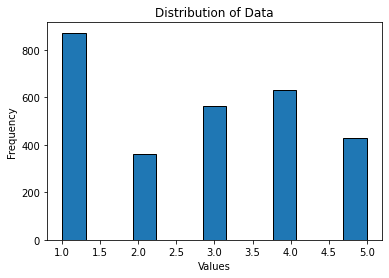

In [34]:
plt.hist(df['GroundService'], bins='auto', edgecolor='black')  # 'auto' determines the number of bins automatically
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Data')
plt.show()

In [35]:
df['GroundService'].mean()
df['GroundService'].median()



3.0

## Route column tranformation

In [36]:
df1 = df.dropna(thresh=df.shape[1] - 4 + 1)
df1.shape

(2806, 19)

In [37]:
df1.tail()

,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment
2928,2928,7.0,British Airways customer review,D Ross,11th June 2015,False,LHR to YVR return. Hard earned Avios points tr...,Business,Business Class,London-Vancouver return,NaN,4.0,5.0,NaN,5.0,yes,Boeing 747-400,4.0,3.0
2929,2929,5.0,British Airways customer review,J Brown,11th June 2015,False,Club World from LHR-ORD. Busy flight on the ag...,Business,Business Class,LHR-ORD,NaN,4.0,2.0,NaN,3.0,yes,Boeing 747-400,3.0,4.0
2930,2930,3.0,British Airways customer review,Kevin Barrance,11th June 2015,False,This review refers to a return trip from India...,Business,Premium Economy,BOM-LHR,NaN,4.0,1.0,NaN,3.0,no,NaN,1.0,3.0
2931,2931,7.0,British Airways customer review,Kevin Barrance,11th June 2015,False,This review concerns LHR-BOM in Business Class...,Business,Business Class,LHR-BOM,NaN,2.0,5.0,NaN,3.0,yes,NaN,2.0,3.0
2932,2932,8.0,British Airways customer review,R Tompkins,11th June 2015,False,Family of 3 - 747 out (upper deck) 777 back. F...,Family Leisure,Business Class,NaN,NaN,4.0,5.0,NaN,5.0,yes,Boeing 747 / 777,5.0,2.0


In [38]:
df1.isnull().sum()

Index                       0
OverallRating               0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller             2
SeatType                    1
Route                       4
DateFlown                   9
SeatComfort                 0
CabinStaffService           0
GroundService              12
ValueForMoney               0
Recommended                 0
Aircraft                  897
Food&Beverages            258
InflightEntertainment    1013
dtype: int64

In [39]:
df1= df1.drop(['Aircraft',"InflightEntertainment"],axis='columns')
df1.dropna(subset=['Route'], inplace=True)


In [40]:
df1.head()
df1.isnull().sum()

Index                  0
OverallRating          0
ReviewHeader           0
Name                   0
Datetime               0
VerifiedReview         0
ReviewBody             0
TypeOfTraveller        2
SeatType               1
Route                  0
DateFlown              8
SeatComfort            0
CabinStaffService      0
GroundService         11
ValueForMoney          0
Recommended            0
Food&Beverages       258
dtype: int64

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802 entries, 0 to 2931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              2802 non-null   int64  
 1   OverallRating      2802 non-null   float64
 2   ReviewHeader       2802 non-null   object 
 3   Name               2802 non-null   object 
 4   Datetime           2802 non-null   object 
 5   VerifiedReview     2802 non-null   bool   
 6   ReviewBody         2802 non-null   object 
 7   TypeOfTraveller    2800 non-null   object 
 8   SeatType           2801 non-null   object 
 9   Route              2802 non-null   object 
 10  DateFlown          2794 non-null   object 
 11  SeatComfort        2802 non-null   float64
 12  CabinStaffService  2802 non-null   float64
 13  GroundService      2791 non-null   float64
 14  ValueForMoney      2802 non-null   float64
 15  Recommended        2802 non-null   object 
 16  Food&Beverages     2544 

In [42]:
col = df1['Route']
col = list(col)
print(len(col))
# Lists to store results
departure_cities = []
arrival_cities = []
layover_cities = []
count=0
for i in col:
    if isinstance(i, str): 
        l = i.split(' to ') if ' to ' in i else i.split('-')
        # print(i, l)
        if len(l) < 2:
            count=count+1
            departure_cities.append(np.nan)
            arrival_cities.append(np.nan)
            layover_cities.append(np.nan)
        else:
            departure_cities.append(l[0].strip())
            if 'via' in l[1]:
                split2 = l[1].split('via')
                arrival_cities.append(split2[0].strip())
                layover_cities.append(split2[1].strip())
            else:
                arrival_cities.append(l[1].strip())
                layover_cities.append(np.nan)

# Create a new DataFrame from the lists
print(count)
print(len(departure_cities))
print(len(arrival_cities))
print(len(layover_cities))
df1['DepartureCity'] = departure_cities
df1['ArrivalCity'] = arrival_cities
df1['LayoverCity'] = layover_cities
df1.to_excel('cleanedData.xlsx')
        

2802
2
2802
2802
2802


In [43]:
rows_with_null_departure_city = df1[df1['DepartureCity'].isnull()]

print(pd.DataFrame(rows_with_null_departure_city))

     Index  OverallRating                  ReviewHeader            Name  \
22      22            1.0     “I hate British Airways!”        S Carter   
220    220            8.0  "nice and professional crew"  Janeks Volkovs   

               Datetime  VerifiedReview  \
22    17th October 2023            True   
220  27th February 2023            True   

                                            ReviewBody TypeOfTraveller  \
22   I hate British Airways! We get to London on Oc...  Couple Leisure   
220  Although it was a bit uncomfortable flight in ...    Solo Leisure   

          SeatType                Route      DateFlown  SeatComfort  \
22   Economy Class  Istanbul via London   October 2023          1.0   
220  Economy Class    London Singapore   February 2023          3.0   

     CabinStaffService  GroundService  ValueForMoney Recommended  \
22                 3.0            1.0            1.0          no   
220                5.0            5.0            4.0         yes   

  

In [44]:
df1.drop([22,220], inplace=True)
df1.to_excel('cleanedData.xlsx',index=False)

In [45]:
df1.isnull().sum()

Index                   0
OverallRating           0
ReviewHeader            0
Name                    0
Datetime                0
VerifiedReview          0
ReviewBody              0
TypeOfTraveller         2
SeatType                1
Route                   0
DateFlown               8
SeatComfort             0
CabinStaffService       0
GroundService          11
ValueForMoney           0
Recommended             0
Food&Beverages        258
DepartureCity           0
ArrivalCity             0
LayoverCity          2315
dtype: int64

In [46]:
rows_with_null_departure_city = df1[df1['DepartureCity'].isnull()]

print(pd.DataFrame(rows_with_null_departure_city))

Empty DataFrame
Columns: [Index, OverallRating, ReviewHeader, Name, Datetime, VerifiedReview, ReviewBody, TypeOfTraveller, SeatType, Route, DateFlown, SeatComfort, CabinStaffService, GroundService, ValueForMoney, Recommended, Food&Beverages, DepartureCity, ArrivalCity, LayoverCity]
Index: []
